# Customer and Order Analytics: Revenue, Conversion, and Cohort Analysis 📊

## Objective
Analyze customer and order behavior from Jan to Sep 2021 to uncover revenue trends, user conversions, and cohort patterns.

In [2]:
!git clone https://github.com/ishita-git16/B2B2C-Platform-Cohort-Analysis.git

Cloning into 'B2B2C-Platform-Cohort-Analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



In a competitive and rapidly digitizing financial services space, understanding user behavior is critical to driving growth and retention. This analysis dives into Gromo's customer and order data between January and September 2021, with the goal of uncovering key performance insights across acquisition, conversion, and revenue generation.

🎯
###Primary Objectives:
Track Revenue Evolution Over Time

Measure total monthly revenue and revenue per user to understand monetization patterns.

Monitor User Acquisition & Conversion

Analyze how many users placed orders and how many actually converted (completed a purchase), segmented by month and profession.

###Perform Cohort-Based Behavioral Analysis

Evaluate how each monthly cohort of newly acquired users performs over time in terms of:

🧾 Number of orders placed

✅ Purchases completed

💰 Revenue generated


### 📊 Key KPIs Explored:
Metric	Description
1. Monthly Revenue	Total order value from 'Won' purchases per month
2. Monthly Active Users	Unique users placing at least one order per month
3. Revenue per User (RPU)
4. Monthly Revenue / Monthly Active Users
5. Conversion Rate :	% of users who made at least one successful purchase
6. Cohort Retention	Engagement and purchase patterns of user groups acquired in the same month

With these KPIs in focus, we aim to identify:

What’s driving growth 📈

Where drop-offs are occurring ⚠️

And which user segments are most valuable 💎

##  Load and Clean Data

In [ ]:
import pandas as pd
from datetime import datetime

# Load datasets
customer_df = pd.read_csv("Case_Study_Customer_Data.csv")
orders_df = pd.read_csv("Case_Study_Orders_Data.csv")



In [ ]:
customer_df.head()

,Cust Id,Customer Created Date,Week,Cust Profession
0,6X894534,"01 Jan, 2021 00:23:41","W1,2021",Insurance Agent
1,8WTK1802,"01 Jan, 2021 01:16:11","W1,2021",Sales Professional
2,0WWO4742,"01 Jan, 2021 06:19:00","W1,2021",Small Merchant
3,V4OO4168,"01 Jan, 2021 06:32:11","W1,2021",Finance Agent
4,Z8EA4622,"01 Jan, 2021 08:42:21","W1,2021",BFSI Professional


In [ ]:
orders_df.head()

,Order No,Cust ID,Order Date,Order Status,Order Amount
0,4.260000e+18,6X894534,21-01-2001 00:36,Other,NaN
1,4.260000e+18,0WWO4742,21-01-2001 06:24,Other,NaN
2,4.260000e+18,V4OO4168,21-01-2001 06:47,Other,NaN
3,4.260000e+18,V4OO4168,21-01-2001 06:51,Other,NaN
4,4.260000e+18,Z8EA4622,21-01-2001 09:02,Other,NaN


In [ ]:
# Calculate missing values percentage for customer_df
customer_missing_percentage = (customer_df.isnull().sum() / len(customer_df)) * 100
print("Missing values percentage in customer_df:")
print(customer_missing_percentage)

print("\n" + "="*30 + "\n")

# Calculate missing values percentage for orders_df
orders_missing_percentage = (orders_df.isnull().sum() / len(orders_df)) * 100
print("Missing values percentage in orders_df:")
print(orders_missing_percentage)

Missing values percentage in customer_df:
Cust Id                  0.000000
Customer Created Date    0.000000
Week                     0.000000
Cust Profession          0.555188
dtype: float64


Missing values percentage in orders_df:
Order No         0.000000
Cust ID          0.000000
Order Date       0.000000
Order Status     0.000000
Order Amount    85.992967
dtype: float64


In [ ]:
# Convert dates and fix inconsistencies
customer_df['Customer_Created_Datetime'] = pd.to_datetime(customer_df['Customer Created Date'], format='%d %b, %Y %H:%M:%S', errors='coerce')
orders_df['Order_Date_Corrected'] = orders_df['Order Date'].str.replace("2001", "2021")
orders_df['Order_Datetime'] = pd.to_datetime(orders_df['Order_Date_Corrected'], format='%d-%m-%Y %H:%M', errors='coerce')
orders_df['Revenue'] = orders_df.apply(lambda row: row['Order Amount'] if row['Order Status'] == 'Won' and pd.notnull(row['Order Amount']) else 0, axis=1)

Imputation with the mode: Since the percentage of missing values is small, filling the missing values with the mode (most frequent profession) is a reasonable approach. This is simple to implement and won't significantly distort the distribution of the Cust Profession column.

In [ ]:
# Calculate the mode of the 'Cust Profession' column
mode_profession = customer_df['Cust Profession'].mode()[0]

# Fill missing values with the mode, assigning the result back to the column
customer_df['Cust Profession'] = customer_df['Cust Profession'].fillna(mode_profession)

In [ ]:
orders_df['Order Amount'] = orders_df['Order Amount'].fillna(0)

In [ ]:
orders_df.dropna(subset=['Order_Datetime'], inplace=True)

In [ ]:
# Calculate missing values percentage for customer_df
customer_missing_percentage = (customer_df.isnull().sum() / len(customer_df)) * 100
print("Missing values percentage in customer_df:")
print(customer_missing_percentage)

print("\n" + "="*30 + "\n")

# Calculate missing values percentage for orders_df
orders_missing_percentage = (orders_df.isnull().sum() / len(orders_df)) * 100
print("Missing values percentage in orders_df:")
print(orders_missing_percentage)

Missing values percentage in customer_df:
Cust Id                      0.0
Customer Created Date        0.0
Week                         0.0
Cust Profession              0.0
Customer_Created_Datetime    0.0
dtype: float64


Missing values percentage in orders_df:
Order No                0.0
Cust ID                 0.0
Order Date              0.0
Order Status            0.0
Order Amount            0.0
Order_Date_Corrected    0.0
Order_Datetime          0.0
Revenue                 0.0
dtype: float64


### Export Cleaned data to excel - to generate data report

In [ ]:
# prompt: export above data into excel

#output_filename = 'gromo_analysis_data.xlsx'

#with pd.ExcelWriter(output_filename) as writer:
#  customer_df.to_excel(writer, sheet_name='Customer_Data', index=False)
#  orders_df.to_excel(writer, sheet_name='Orders_Data', index=False)

#print(f"Data successfully exported to {output_filename}")

## Step 2: Merge Data & Assign Cohorts

In [ ]:
merged_df = pd.merge(orders_df, customer_df, left_on='Cust ID', right_on='Cust Id', how='inner')
merged_df['Cohort_Month'] = merged_df['Customer_Created_Datetime'].dt.to_period('M').astype(str)
merged_df['Order_Month'] = merged_df['Order_Datetime'].dt.to_period('M').astype(str)

In [ ]:
# Fix order month column
merged_df['Order_Month'] = merged_df['Order_Datetime'].dt.to_period('M').astype(str)

# Filter valid months from Jan to Sep 2021
valid_months = pd.period_range('2021-01', '2021-09', freq='M').astype(str)
filtered_df = merged_df[merged_df['Order_Month'].isin(valid_months)]

# Calculate metrics
monthly_summary = filtered_df.groupby('Order_Month').agg(
    Monthly_Revenue=('Revenue', 'sum'),
    Monthly_Users=('Cust ID', pd.Series.nunique)
).reset_index()

# Calculate Revenue per User
monthly_summary['Revenue_per_User'] = (
    monthly_summary['Monthly_Revenue'] / monthly_summary['Monthly_Users']
).round(2)

# Round for presentation
monthly_summary['Monthly_Revenue'] = monthly_summary['Monthly_Revenue'].round(2)

print(monthly_summary)


  Order_Month  Monthly_Revenue  Monthly_Users  Revenue_per_User
0     2021-01          19016.0             83            229.11
1     2021-02          39877.0            142            280.82
2     2021-03         103624.0            164            631.85
3     2021-04         103239.0            197            524.06
4     2021-05         131116.0            186            704.92
5     2021-06         274130.0            259           1058.42
6     2021-07         277148.0            166           1669.57
7     2021-08          96182.0             90           1068.69
8     2021-09         102961.0             52           1980.02



Revenue and users steadily increase from Jan to May 2021, showing growing customer engagement.

Revenue per user jumps especially in May, indicating more high-value purchases or better conversion.

Initial months (Jan–Feb) show low values, likely due to new user onboarding and learning curve.

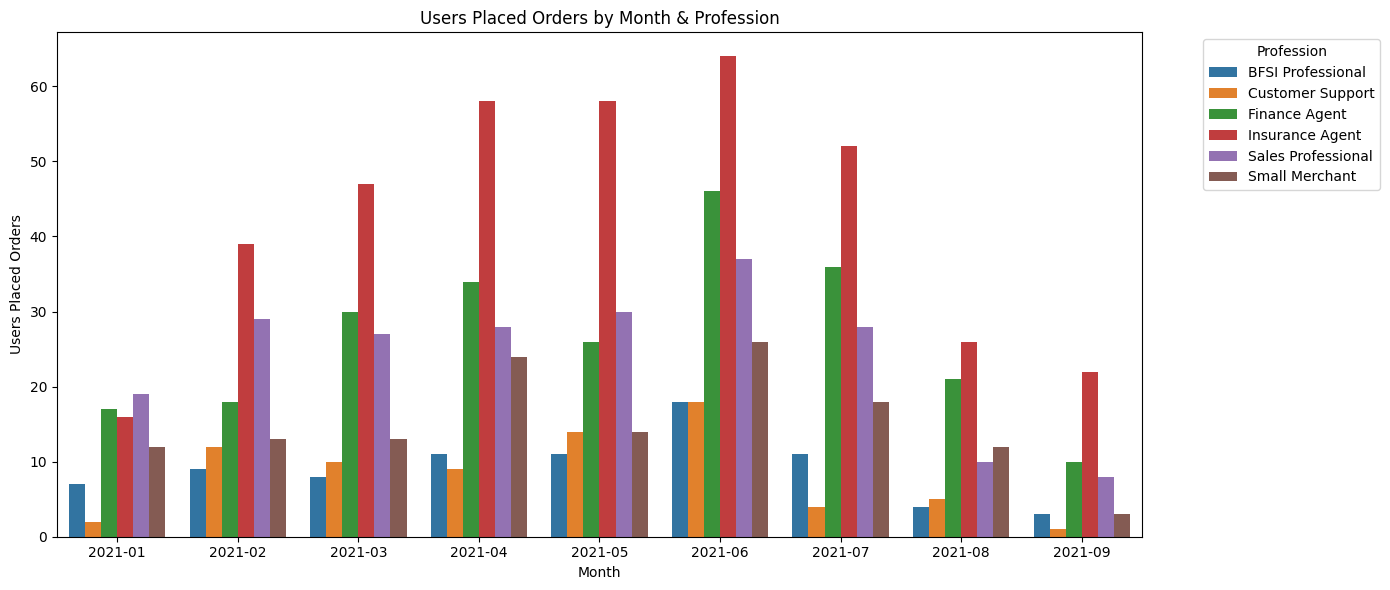

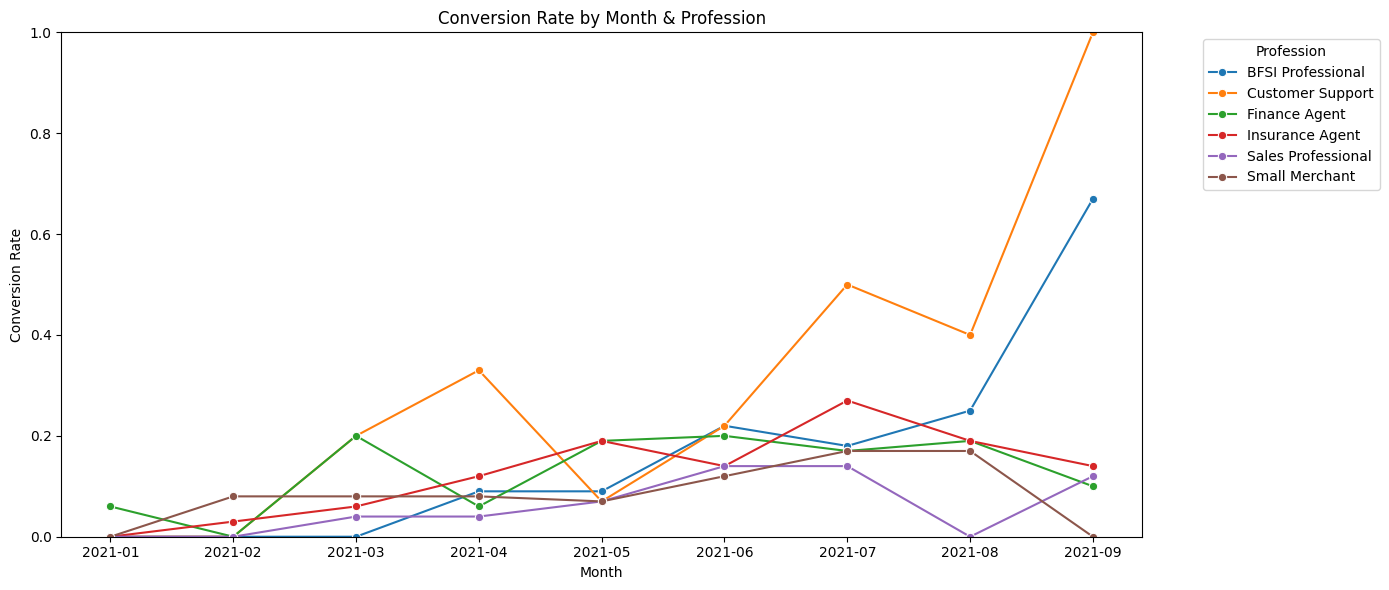

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid months and create working copy
valid_months = pd.period_range('2021-01', '2021-09', freq='M').astype(str)
filtered_df = merged_df[merged_df['Order_Month'].isin(valid_months)].copy()

# Add conversion flag
filtered_df['Is_Purchase'] = filtered_df['Order Status'] == 'Won'

# Remove duplicate user-month-profession records
user_conversion_filtered = filtered_df.drop_duplicates(subset=['Cust ID', 'Order_Month', 'Cust Profession'])

#  Group by month and profession
conversion_summary = user_conversion_filtered.groupby(['Order_Month', 'Cust Profession']).agg(
    Users_Placed_Order=('Cust ID', 'count'),
    Users_Converted=('Is_Purchase', 'sum')
).reset_index()

#  Add conversion rate
conversion_summary['Conversion_Rate'] = (
    conversion_summary['Users_Converted'] / conversion_summary['Users_Placed_Order']
).round(2)

# Filter top 6 professions by order volume
top_professions = (
    conversion_summary.groupby('Cust Profession')['Users_Placed_Order'].sum()
    .sort_values(ascending=False)
    .head(6)
    .index.tolist()
)
visual_df = conversion_summary[conversion_summary['Cust Profession'].isin(top_professions)]

#  Plot 1 - Stacked Bar: Orders Placed
plt.figure(figsize=(14, 6))
sns.barplot(data=visual_df, x='Order_Month', y='Users_Placed_Order', hue='Cust Profession')
plt.title('Users Placed Orders by Month & Profession')
plt.xlabel('Month')
plt.ylabel('Users Placed Orders')
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2 - Line Chart: Conversion Rate
plt.figure(figsize=(14, 6))
sns.lineplot(data=visual_df, x='Order_Month', y='Conversion_Rate', hue='Cust Profession', marker='o')
plt.title('Conversion Rate by Month & Profession')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.ylim(0, 1)
plt.legend(title='Profession', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📈
###Analysis:
User Purchase Behavior by Profession (Jan–Sep 2021)

🔍 Key Insights:

Insurance Agents and Finance Agents were the most active user segments, showing consistent order placement across months. Insurance Agents peaked in June 2021 with over 60 users placing orders.

Sales Professionals showed early traction but plateaued after April, suggesting limited ongoing engagement.

Small Merchants and BFSI Professionals exhibited gradual growth till mid-year, indicating potential that may be under-leveraged.

Customer Support users showed consistently low engagement, hinting at possible product-market mismatch for this segment.

🧠 ##Potential Reasons:

High engagement among Insurance/Finance Agents may be due to stronger product relevance (e.g., collections, daily transactions).

The June peak could correspond with internal campaigns, financial year cycles, or seasonal business activity.

Q3 (Jul–Sep) saw a drop across all segments, potentially due to:

Saturation of early cohorts

Lack of sustained retention initiatives

External seasonal slowdown

✅ ##Recommendations:

Double down on proven segments
Focus acquisition and retention efforts on Insurance and Finance Agents using loyalty programs and targeted messaging.

Re-ignite dormant segments
Re-engage Sales Professionals through nudges, incentives, or simplified user journeys.

Unlock potential in BFSI/SME segments
Educate and onboard through webinars, simplified KYC flows, or referral-based campaigns.

Investigate Q3 decline
Run churn diagnostics (survey, funnel drop-offs) and test new retention strategies (e.g., reactivation campaigns).



## Step 3: Cohort Analysis

In [ ]:
# Filter and copy valid months
valid_months = pd.period_range('2021-01', '2021-09', freq='M').astype(str)
cohort_df = merged_df[merged_df['Order_Month'].isin(valid_months)].copy()

# Add flags for cohort analysis
cohort_df['Is_Purchase'] = cohort_df['Order Status'] == 'Won'
cohort_df['Order_Count'] = 1

#  Orders placed by cohort month vs order month
orders_cohort = cohort_df.pivot_table(
    index='Cohort_Month',
    columns='Order_Month',
    values='Order_Count',
    aggfunc='sum'
).fillna(0).astype(int)


print("Cohort Analysis: Orders Placed")
#print(orders_cohort)
orders_cohort.style.background_gradient(cmap='Blues')

Cohort Analysis: Orders Placed


Order_Month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohort_Month,,,,,,,,,
2021-01,119,69,27,24,25,22,26,22,13
2021-02,0,126,97,21,22,32,20,13,8
2021-03,0,0,143,94,31,29,26,15,9
2021-04,0,0,0,143,59,28,30,21,8
2021-05,0,0,0,0,135,87,34,25,8
2021-06,0,0,0,0,0,212,98,27,16


In [ ]:
# Step 4: Purchases made by cohort month vs order month
purchases_cohort = cohort_df[cohort_df['Is_Purchase']].pivot_table(
    index='Cohort_Month',
    columns='Order_Month',
    values='Order_Count',
    aggfunc='sum'
).fillna(0).astype(int)

print("\n Cohort Analysis: Purchases Made")
#print(purchases_cohort)
purchases_cohort.style.background_gradient(cmap='Greens')


 Cohort Analysis: Purchases Made


Order_Month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohort_Month,,,,,,,,,
2021-01,3,5,10,10,8,8,7,1,2
2021-02,0,3,11,4,6,14,5,1,1
2021-03,0,0,3,11,9,8,11,3,2
2021-04,0,0,0,0,5,0,4,4,2
2021-05,0,0,0,0,7,16,9,2,2
2021-06,0,0,0,0,0,9,7,6,4


In [ ]:

# Ensure Revenue column is clean
cohort_df['Revenue'] = cohort_df['Revenue'].fillna(0)

# Pivot for Revenue by Cohort
revenue_cohort = cohort_df.pivot_table(
    index='Cohort_Month',
    columns='Order_Month',
    values='Revenue',
    aggfunc='sum'
).fillna(0).round(2)

#  Print the revenue cohort table
print("Cohort Analysis: Revenue by Month")
#print(revenue_cohort)
revenue_cohort.style.background_gradient(cmap='copper')

Cohort Analysis: Revenue by Month


Order_Month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09
Cohort_Month,,,,,,,,,
2021-01,19016.000000,13847.000000,20459.000000,40730.000000,47141.000000,29525.000000,28153.000000,8855.000000,33550.000000
2021-02,0.000000,26030.000000,72377.000000,3820.000000,29708.000000,80635.000000,44289.000000,3872.000000,16791.000000
2021-03,0.000000,0.000000,10788.000000,58689.000000,10128.000000,33390.000000,103962.000000,19590.000000,14582.000000
2021-04,0.000000,0.000000,0.000000,0.000000,15189.000000,0.000000,7158.000000,51842.000000,4117.000000
2021-05,0.000000,0.000000,0.000000,0.000000,28950.000000,69385.000000,58775.000000,3332.000000,27037.000000
2021-06,0.000000,0.000000,0.000000,0.000000,0.000000,61195.000000,34811.000000,8691.000000,6884.000000


###Cohort Analysis : Insights

Users acquired in earlier months (Jan–Mar) showed sustained purchase behavior over multiple months.

The cohort decay (drop in orders/revenue over time) is expected, but certain cohorts showed stronger retention (e.g., Feb and Mar).

Revenue cohort analysis revealed which acquisition months brought not just users, but high-value customers.

## Conclusion : Final Recommendations

1. Double Down on High-Value Segments

2. Focus retention and upsell strategies on Insurance and Finance professionals.

3. Investigate Drop-offs in Q3

4. Analyze user activity logs, feedback, or session data to determine why many users stopped transacting after June.

5. Boost Retention Through Cohort-Specific Campaigns

6. Personalized campaigns (email/SMS/IVR) for users in 30/60/90 day cohorts can boost repeat activity.

7. Explore Product Fit for Lower-Engagement Segments

8. Conduct qualitative interviews with Customer Support and BFSI segments to better understand friction points.

9. Expand Cohort Tracking Beyond Purchases

10. Consider adding metrics like AOV, retention rate, and feature usage to deepen behavioral understanding.


